In [ ]:
# Example usage
width = 10
height = 10
box = AnimationBox(width, height)
r = np.array([[5, 5], [2, 2]])
theta = np.array([[0], [np.pi / 4]])
box.add_particles(r, theta)
num_steps = 20
dt = 0.1

for step in range(num_steps):
    r_dot = np.random.uniform(-1, 1, size=(2, 2))
    theta_dot = np.random.uniform(-np.pi / 4, np.pi / 4, size=(2, 1))
    r = r + r_dot * dt
    theta = theta + theta_dot * dt
    box.update_particles(r, theta, step)

box.animate(show_arrows=True)

In [13]:
def animate_particles(r: np.ndarray, theta: np.ndarray, width: float, height: float, show_arrows: bool=False, gif_filename: str="particles.gif"):
    """
    Create an animated GIF of particles with their positions in every frame and optionally display arrows
    representing their headings at each frame.

    Parameters
    ----------
    r : jnp.ndarray
        A 3D array of particle positions with shape (n_frames, n_particles, 2).
    theta : jnp.ndarray
        A 2D array of particle headings with shape (n_frames, n_particles).
    width : float
        The width of the region to be animated.
    height : float
        The height of the region to be animated.
    show_arrows : bool, optional
        If True, arrows representing particle headings will be displayed in the animation. Default is False.
    gif_filename : str, optional
        The filename for the output animated GIF. Default is "particles.gif".

    Returns
    -------
    None
        The function saves an animated GIF file with the specified filename.
    """
    r = np.asarray(r)
    theta = np.asarray(theta)
    
    n_frames, n_particles, _ = r.shape

    # Create an array to store the frames
    frames = []

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-width/2, width/2)
    ax.set_ylim(-height/2, height/2)

    for frame in (pbar := tqdm(range(n_frames))):
        pbar.set_description(f"Processing {frame}")
        
        # Clear the axis
        ax.clear()
        ax.set_xlim(-width/2, width/2)
        ax.set_ylim(-height/2, height/2)

        # Plot the particle positions
        positions = r[frame]
        ax.scatter(positions[:, 0], positions[:, 1])

        if show_arrows:
            # Calculate the heading vectors
            headings = np.column_stack((np.cos(theta[frame]), np.sin(theta[frame])))
            # Plot the arrows using quiver
            ax.quiver(positions[:, 0], positions[:, 1], headings[:, 0], headings[:, 1], color='red', angles='xy', scale_units='xy', scale=1)

        # Save the frame to the buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        frames.append(buf.getvalue())
        buf.close()

    # Save the frames as an animated GIF
    images = [Image.open(io.BytesIO(frame)) for frame in frames]
    images[0].save(gif_filename, save_all=True, append_images=images[1:], loop=0, duration=100)

NameError: name 'tqdm' is not defined

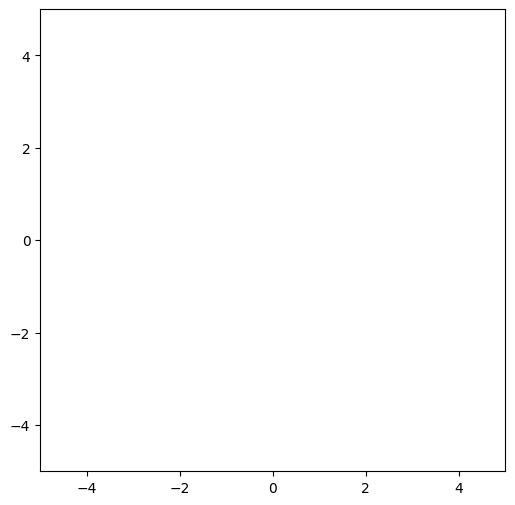

In [14]:
# Example usage
n_frames = 10
n_particles = 5
width = 10
height = 10

r = np.random.rand(n_frames, n_particles, 2) * np.array([width, height])
theta = np.random.rand(n_frames, n_particles) * 2 * np.pi

animate_particles(r, theta, width, height, show_arrows=True)


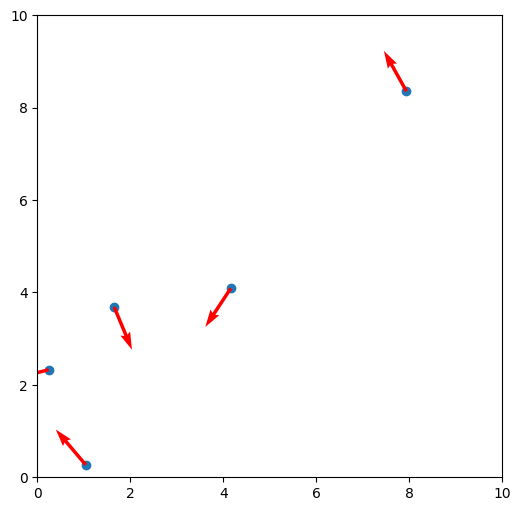

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
from PIL import Image
import io

def animate_particles(r, theta, width, height, show_arrows=False, gif_filename="particles.gif"):
    n_frames, n_particles, _ = r.shape

    # Create an array to store the frames
    frames = []

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)

    for frame in range(n_frames):
        # Clear the axis
        ax.clear()
        ax.set_xlim(0, width)
        ax.set_ylim(0, height)

        for particle in range(n_particles):
            # Plot the particle position
            position = r[frame, particle]
            heading = theta[frame, particle]
            ax.plot(position[0], position[1], 'o')

            if show_arrows:
                # Add an arrow to represent the heading
                dx = np.cos(heading)
                dy = np.sin(heading)
                arrow = FancyArrow(position[0], position[1], dx, dy, width=0.1, length_includes_head=True, color='red')
                ax.add_patch(arrow)

        # Save the frame to the buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        frames.append(buf.getvalue())
        buf.close()

    # Save the frames as an animated GIF
    images = [Image.open(io.BytesIO(frame)) for frame in frames]
    images[0].save(gif_filename, save_all=True, append_images=images[1:], loop=0, duration=100)

# Example usage
n_frames = 10
n_particles = 5
width = 10
height = 10

r = np.random.rand(n_frames, n_particles, 2) * np.array([width, height])
theta = np.random.rand(n_frames, n_particles) * 2 * np.pi

animate_particles(r, theta, width, height, show_arrows=True)
